In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mplcursors
%matplotlib inline
import pandas as pd
from matplotlib.lines import Line2D
from scipy.stats import linregress 

In [2]:
pd.option_context('display.precision', 10)
pd.set_option('display.float_format', '{:.10f}'.format)

In [3]:
df=pd.read_csv("classified_lcs\grs1915_lc18.txt",sep="	",skiprows=[0, 1], header=None)

In [4]:
n=len(df)

In [5]:
df.columns = ['time', 'total','low','mid','high'] #time in seconds

In [6]:
df

,time,total,low,mid,high
0,77155536.0625000000,2539.2000378370,1366.4000203609,1172.8000174761,1008.0000000000
1,77155536.1875000000,2390.4000356197,1248.0000185966,1142.4000170231,776.0000000000
2,77155536.3125000000,2622.4000390768,1433.6000213623,1188.8000177145,888.0000000000
3,77155536.4375000000,2566.4000382423,1358.4000202417,1208.0000180006,944.0000000000
4,77155536.5625000000,2416.0000360012,1265.6000188589,1150.4000171423,872.0000000000
...,...,...,...,...,...
9850,77156767.3125000000,2420.8000360727,1193.6000177860,1227.2000182867,704.0000000000
9851,77156767.4375000000,2515.2000374794,1217.6000181437,1297.6000193357,784.0000000000
9852,77156767.5625000000,2880.0000429153,1428.8000212908,1451.2000216246,864.0000000000
9853,77156767.6875000000,2830.4000421762,1387.2000206709,1443.2000215054,864.0000000000


In [7]:
df["total"] - (df["low"] + df["mid"])

0       0.0000000000
1       0.0000000000
2      -0.0000000000
3       0.0000000000
4      -0.0000000000
            ...     
9850    0.0000000000
9851    0.0000000000
9852   -0.0000000000
9853   -0.0000000000
9854   -0.0000000000
Length: 9855, dtype: float64

In [8]:
#time step is 0.125 sec

In [9]:
low=np.array(list(df["low"]))
mid=np.array(list(df["mid"]))
high=np.array(list(df["high"]))

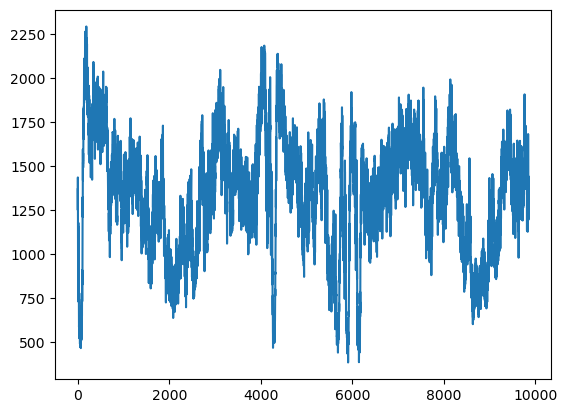

In [10]:
plt.plot(range(len(low)),low)
plt.show()

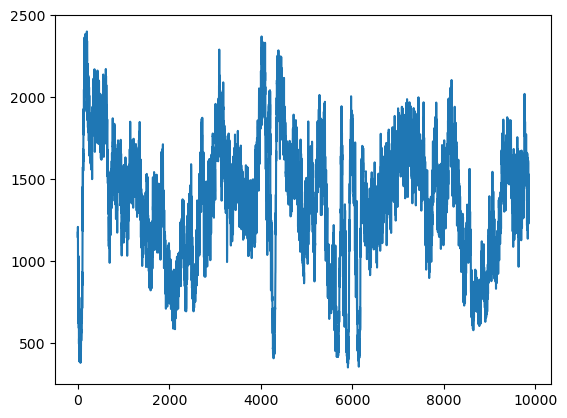

In [12]:
plt.plot(range(len(mid)),mid)
plt.show()

Null Hypothesis: a and b are compatible <br/>
    1) Get the distribution of (a-b)/sqrt(2*N)
         <pre>( since N isnt given,we use the estimator N=(a+b)/2 )</pre>
    2) Expect a normal gaussian,check summary statistic: average and sigma<br/>
    3) do same for all files,get histogram for all Lc_i<br/>
    4) make a simulation and check the expected vs the obsered

In [13]:
np.std(low)

322.77910958705604

In [14]:
np.std(mid)

367.8600563125097

In [15]:
np.mean(low)

1335.9893045348845

In [16]:
np.mean(mid)

1369.409091943076

In [17]:
x=(low[4000:]-mid[4000:])/np.sqrt(low[4000:]+mid[4000:])

In [18]:
np.std(x)

1.6906961445894306

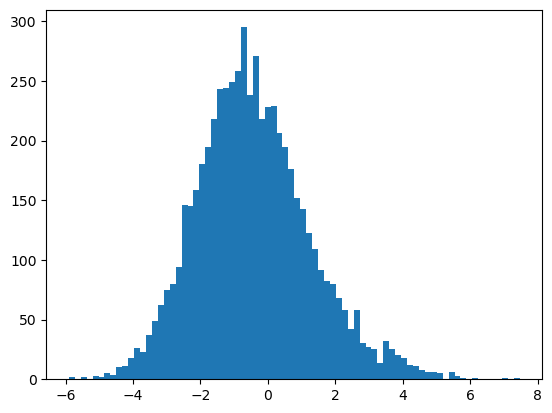

In [19]:
plt.hist(x,int(np.sqrt(len(x))))
plt.show()

In [20]:
total=0
for i in range(n):
    if(x[i]>0):
        total+=1
print(total)
print(total/n)

IndexError: index 5855 is out of bounds for axis 0 with size 5855

In [ ]:
color=[]
list_=[]
r=0
for i in range(len(low)):
    if low[i]>=mid[i]: 
        color.append("red")
        r+=1
    else:
        color.append("blue")
        list_.append(i)


print(r)
plt.scatter(range(len(low)),low,c=color,s=2)

#plt.figure(figsize=(12, 6))  # Width is 12, Height is 6 (default is usually (6, 4))
plt.xlim(3000,6000)
#mplcursors.cursor()  # Enable zoomable interactivity
plt.show()
#plt.clear()
plt.scatter(range(len(low)),mid,c=color,s=2)
plt.xlim(3000,6000)
plt.show()
#
plt.scatter(range(len(high)),high,c=color,s=2)
plt.xlim(3000,6000)
plt.show()

3491


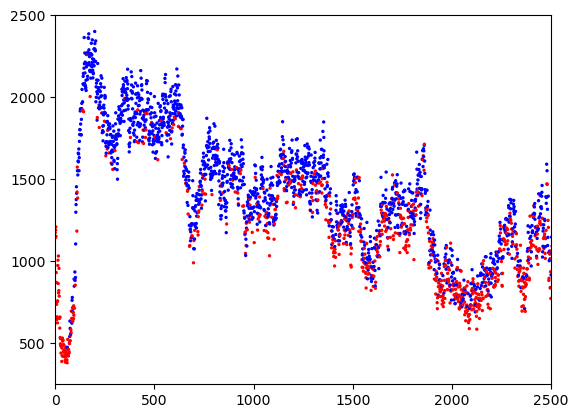

In [21]:
color=[]
list_=[]
r=0
for i in range(len(mid)):
    if low[i]>=mid[i]: 
        color.append("red")
        r+=1
    else:
        color.append("blue")
        list_.append(i)
        
print(r)
plt.scatter(range(len(low)),mid,c=color,s=2)
#plt.figure(figsize=(12, 6))  # Width is 12, Height is 6 (default is usually (6, 4))
plt.xlim(0,2500)
#mplcursors.cursor()  # Enable zoomable interactivity
plt.show()

In [22]:
len(low)

9855